# HW4

## GENERAL INSTRUCTIONS:

- **CLEARLY** mark where you are answering each question (all written questions must be answered in Markdown cells, NOT as comments in code cells)
- Show all code necessary for the analysis, but remove superfluous code

---

Using the dataset [HW4_1](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW4_1.csv),

- **a) (15 points)** Build a Linear Regression Model to predict `y` from all the `X` variables (`X1` to `X50`).
    - Use TTS with a 90/10 split (since data is large)
    - z-score your predictors
    - record the MSE/R2 for both training/test sets
    
    
    
- **b) (10 points)** Thouroughly discuss the performance of the model built in part a. (*IN A MARKDOWN CELL*)



- **c) (35 points)** Build a NEW Linear Regression Model, but using PCA:
    - first, Use TTS with a 90/10 split (since data is large)
    - z-score your predictors
    - next, apply PCA to the *training set*.
    - make a scree plot
    - (15 of 35 points) **Thouroughly discuss** what the scree plot tells you about the `X` variables and their relationships to each other. (*IN A MARKDOWN CELL*)
    - Figure out how many PCs you need to keep to retain 90% of the original variance.
    - Use the fitted PCA model to create those component scores for both *training* and *test* set. DO NOT refit the PCA model on the test set.
    - fit your model using these components and record the MSE/R2 for both training/test sets
    
    
- **d) (20 points)** Thouroughly discuss how the performance of the model built in part c differs from the model in part a. In your answer, discuss how PCA works, and how that may relate to the change in performance you observed. Also discuss why z-scoring before applying PCA is important.(*IN A MARKDOWN CELL*)



- **e) (20 points)** Thouroughly discuss whether *for this data set* you would choose to use the full data, or the Principle Components selected in part c, what are the advantages/disadvantages? (*IN A MARKDOWN CELL*)

In [2]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score #model evaluation
from sklearn.model_selection import train_test_split # simple TT split cv

## a) Build a Linear Regression Model to predict `y` from all the `X` variables (`X1` to `X50`).

In [34]:
df = pd.read_csv("../Data/HW4_1.csv")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,y
0,0.384149,1.111962,0.373605,0.917501,1.134492,0.960647,0.627464,0.958256,0.471226,0.642484,...,0.088335,0.345949,-0.368745,-0.445129,-0.010879,-0.271876,-0.394958,-0.146254,-0.476075,24.470958
1,0.840275,0.012389,0.970561,0.051327,0.708077,0.527206,0.696664,0.722517,1.380874,0.959594,...,0.563963,0.123787,0.042312,0.361144,-0.192868,0.213551,-0.507160,0.472163,0.346417,29.350043
2,-0.524459,0.171770,-0.352452,-0.832353,-0.427443,-0.295201,-0.692488,0.101357,-0.200059,-0.515774,...,-1.647765,-1.107207,-1.380130,-0.937277,0.007752,-1.425836,-0.724967,-1.823506,-1.507816,-75.143042
3,-0.651513,-1.076732,-0.689102,0.022812,-1.030788,-0.507673,-1.708206,-0.862988,-0.821164,-0.726695,...,1.686901,1.402889,0.464069,1.226353,0.655251,1.304203,1.128789,1.228063,0.905470,11.952432
4,-0.473348,0.064595,0.058449,0.401638,0.078103,-1.110774,0.230972,0.107108,0.130277,0.373338,...,1.068410,0.375697,1.329678,1.857105,0.891412,1.715978,1.707637,1.250494,1.241173,61.165560


In [35]:
# predictor values
features = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", 
            "X11", "X12", "X13", "X14", "X15", "X16", "X17", "X18", "X19", "X20", 
            "X21", "X22", "X23", "X24", "X25", "X26", "X27", "X28", "X29", "X30", 
            "X31", "X32", "X33", "X34", "X35", "X36", "X37", "X38", "X39", "X40", 
            "X41", "X42", "X43", "X44", "X45", "X46", "X47", "X48", "X49", "X50"]
#outcome values
outcome = ["y"]

# predictors
X = df[features]
# outcomes
y = df[outcome]

#Use TTS with a 90/10 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

z = StandardScaler()

# z-score your predictors
# ONLY FIT ON TRAINING SET
# transform train and test set to get the actual z-score 
X_train[features] = z.fit_transform(X_train[features])
X_test[features] = z.transform(X_test[features])

# create empty linear reg model
lr = LinearRegression()
# fit the model
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
# record the MSE/R2 for both training/test sets

predsTrain = lr.predict(X_train) 
predsTest = lr.predict(X_test) 

print("Linear Regression Train: ", lr.score(X_train, y_train))
print("Linear Regression Test: ", lr.score(X_test, y_test))

mse = mean_squared_error(y_train, predsTrain)
r2 = r2_score(y_train,predsTrain)
print("Linear Regression Train MSE: ", mse)
print("Linear Regression Train R2: ", r2)

mse = mean_squared_error(y_test, predsTest)
r2 = r2_score(y_test,predsTest)
print("Linear Regression Test MSE: ", mse)
print("Linear Regression Test R2: ", r2)

Linear Regression Train:  0.9990735347874488
Linear Regression Test:  0.9989460667903343
Linear Regression Train MSE:  3.8805628492251145
Linear Regression Train R2:  0.9990735347874488
Linear Regression Test MSE:  4.254353460709695
Linear Regression Test R2:  0.9989460667903343


## b) Thouroughly discuss the performance of the model built in part a.

The mean squared error is a measure of how well our model is doing (model success). This means that if we have a low MSE, our model is doing well, and if we have a high MSE, our model isn't doing too great.

R2 is a unitless way of assessing how well our model did by showing us the percentage of varaition accounted for by our model. R2 score is interpreted as whether our model is doing better than just predicting the mean for eveything. The higher the score is (the closer to 1), the better it is at predicting, therefore it has great performance. A score close to 0 means it's doing no better than just predicting the mean each time, therefore it has poor performance.

Based on the MSE and the R2 for the training set (3.88 and 0.999 respectively), the model's performance is great since the MSE is low and the R2 is very close to 1. 

The MSE and the R2 for the testing set (4.25 and 0.998 respectively) also shows that the model performed well.

The model is performing very well with the testing and training sets and when comparing the R2's, we can see that there is no overfiiting since the R2's are roughly the same (not higher for the training dat compared to the testing set).

## c) Build a NEW Linear Regression Model, but using PCA.

In [3]:
dfPCA = pd.read_csv("../Data/HW4_1.csv")
dfPCA.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,y
0,0.384149,1.111962,0.373605,0.917501,1.134492,0.960647,0.627464,0.958256,0.471226,0.642484,...,0.088335,0.345949,-0.368745,-0.445129,-0.010879,-0.271876,-0.394958,-0.146254,-0.476075,24.470958
1,0.840275,0.012389,0.970561,0.051327,0.708077,0.527206,0.696664,0.722517,1.380874,0.959594,...,0.563963,0.123787,0.042312,0.361144,-0.192868,0.213551,-0.507160,0.472163,0.346417,29.350043
2,-0.524459,0.171770,-0.352452,-0.832353,-0.427443,-0.295201,-0.692488,0.101357,-0.200059,-0.515774,...,-1.647765,-1.107207,-1.380130,-0.937277,0.007752,-1.425836,-0.724967,-1.823506,-1.507816,-75.143042
3,-0.651513,-1.076732,-0.689102,0.022812,-1.030788,-0.507673,-1.708206,-0.862988,-0.821164,-0.726695,...,1.686901,1.402889,0.464069,1.226353,0.655251,1.304203,1.128789,1.228063,0.905470,11.952432
4,-0.473348,0.064595,0.058449,0.401638,0.078103,-1.110774,0.230972,0.107108,0.130277,0.373338,...,1.068410,0.375697,1.329678,1.857105,0.891412,1.715978,1.707637,1.250494,1.241173,61.165560


In [4]:
# predictor values
features = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", 
            "X11", "X12", "X13", "X14", "X15", "X16", "X17", "X18", "X19", "X20", 
            "X21", "X22", "X23", "X24", "X25", "X26", "X27", "X28", "X29", "X30", 
            "X31", "X32", "X33", "X34", "X35", "X36", "X37", "X38", "X39", "X40", 
            "X41", "X42", "X43", "X44", "X45", "X46", "X47", "X48", "X49", "X50"]
#outcome values
outcome = ["y"]

# predictors
XPCA = dfPCA[features]
# outcomes
yPCA = dfPCA[outcome]

#Use TTS with a 90/10 split
Xz_train, Xz_test, yz_train, yz_test = train_test_split(XPCA, yPCA, test_size=0.1)

zscore = StandardScaler()

# z-score your predictors
# ONLY FIT ON TRAINING SET
# transform train and test set to get the actual z-score 
Xz_train[features] = zscore.fit_transform(Xz_train[features])
Xz_test[features] = zscore.transform(Xz_test[features])

# create empty PCA model
pca = PCA()
# fit the model
pca.fit(Xz_train)

PCA()

In [5]:
Xz_train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50
318,1.244088,0.496209,0.398037,0.246526,-0.013490,0.741276,0.607927,0.971245,0.103683,0.277227,...,1.158246,1.764247,-0.231732,0.582873,0.685110,-0.530606,0.390872,-0.009162,1.164736,-0.000397
76,-0.363288,0.443217,0.119135,1.276245,0.007350,0.229201,0.295780,0.847606,-0.450767,0.102544,...,0.125753,0.491999,0.525438,1.235199,0.216760,0.553235,0.257048,0.788324,0.215378,-0.014456
601,-0.326728,-0.342512,0.751706,-0.464603,-0.383940,0.481630,0.659537,0.582913,0.845485,0.340160,...,0.155951,-0.520879,0.234133,-0.315813,0.531055,0.104438,-0.250896,-0.615035,-0.579841,-0.175754
121,-1.085785,-0.564021,-1.475482,-1.953472,-1.556435,-1.273854,-1.298182,-1.670705,-1.146961,-1.670996,...,0.716609,0.037694,-0.175053,0.043556,0.737361,-0.027107,0.000729,0.265167,0.576583,0.224699
187,0.666646,-0.021680,-0.209571,0.833362,0.399591,0.778108,-0.165430,0.005680,0.475026,-0.340930,...,-0.734797,-1.059631,-0.027020,-1.346883,-0.591081,-1.471156,-1.038099,-1.485814,-0.739901,-0.102589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,-2.408214,-3.114955,-2.238034,-3.665721,-2.553791,-3.143450,-2.443754,-2.687299,-3.239633,-3.098628,...,0.300193,0.648500,-0.402612,0.085174,0.535727,0.219571,-0.548391,-0.457588,0.275483,-0.046350
917,-1.067897,-1.231560,-1.818434,-1.529509,-0.956870,-1.394204,-0.907411,-0.873942,-1.164107,-0.923478,...,0.694604,0.510504,1.486134,0.394669,0.164320,0.577713,0.966883,0.809120,0.907378,0.804472
822,0.361989,0.059878,0.631284,0.404696,1.093804,0.466283,0.522943,0.579474,0.059143,0.779191,...,-0.911498,-0.413516,-0.836623,-1.192256,-1.147228,-1.119494,-0.540637,-1.571001,-0.251390,-0.257299
498,-0.330888,-0.621642,-0.298705,-0.866033,-0.512908,-0.903498,-0.233058,-0.245438,0.157620,-0.702292,...,-0.796918,-1.171290,-1.017005,-1.300227,-1.555201,-0.148171,-0.465202,-1.223412,-1.157296,-0.891115


In [6]:
Xz_train.shape

(900, 50)

In [63]:
pcaDF = pd.DataFrame({"expl_var" : pca.explained_variance_ratio_, 
    "pc": range(1,51), "cum_var": pca.explained_variance_ratio_.cumsum()})

pcaDF.head()

,expl_var,pc,cum_var
0,0.426718,1,0.426718
1,0.395398,2,0.822115
2,0.007565,3,0.829680
3,0.006331,4,0.836011
4,0.006067,5,0.842078


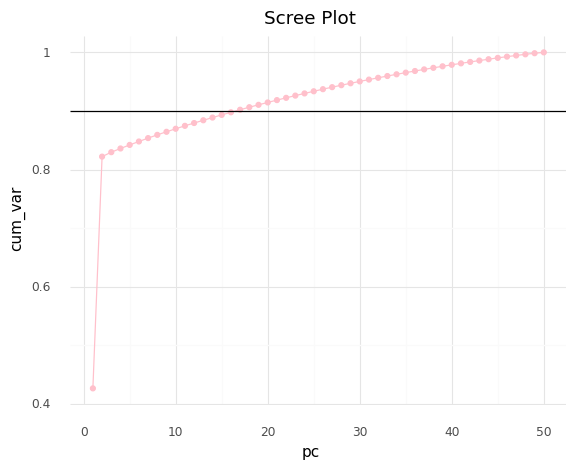

<ggplot: (8794474083377)>

In [65]:
# Cumulative Variance Scree Plot
# We want to choose the number of components based on 90% thresshold of original variability that we want to retain
(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line(color = "pink") +
    geom_point(color = "pink") + geom_hline(yintercept = 0.90) + labs(title = "Scree Plot")+ theme_minimal())
# looks like 16 principle components at the 90% threshhold

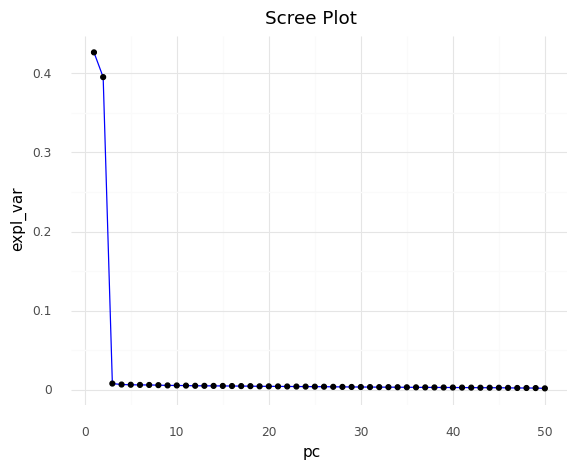

<ggplot: (8794474224117)>

In [64]:
# Explained Variance Scree Plot
# looking for point of inflection
(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line(color = "blue") +
    geom_point(color = "black") + theme_minimal() + labs(title = "Scree Plot"))
# looks like 3 priciple components bc the point of inflection is at 3

In [66]:
# for 16 principle components when looking at the cululative variance scree plot
# record the MSE/R2 for both training/test sets for 16 principle components

pcomps16_train = pca.transform(Xz_train)
pcomps16_train = pd.DataFrame(pcomps16_train[:,0:16])

pcomps16_test = pca.transform(Xz_test)
pcomps16_test = pd.DataFrame(pcomps16_test[:,0:16])

lr2 = LinearRegression()
lr2.fit(pcomps16_train, yz_train)
print("Linear Regression using PCA Train with 16 Pinciple Components: ", lr2.score(pcomps16_train, yz_train))
print("Linear Regression using PCA Test with 16 Pinciple Components: ", lr2.score(pcomps16_test, yz_test))

pred1 = lr2.predict(pcomps16_train) 
pred2 = lr2.predict(pcomps16_test) 

train_mse_16 = mean_squared_error(yz_train, pred1)
train_r2_16 = r2_score(yz_train,pred1)
print("Linear Regression using PCA Train MSE with 16 Pinciple Components: ",train_mse_16)
print("Linear Regression using PCA Train R2 with 16 Pinciple Components: ",train_r2_16)

test_mse_16 = mean_squared_error(yz_test, pred2)
tst_r2_16 = r2_score(yz_test,pred2)
print("Linear Regression using PCA Test MSE with 16 Pinciple Components: ",test_mse_16)
print("Linear Regression using PCA Test R2 with 16 Pinciple Components: ", tst_r2_16)

Linear Regression using PCA Train with 16 Pinciple Components:  0.9922199827589052
Linear Regression using PCA Test with 16 Pinciple Components:  0.9852358890278086
Linear Regression using PCA Train MSE with 16 Pinciple Components:  33.254116600134644
Linear Regression using PCA Train R2 with 16 Pinciple Components:  0.9922199827589052
Linear Regression using PCA Test MSE with 16 Pinciple Components:  48.54541867525877
Linear Regression using PCA Test R2 with 16 Pinciple Components:  0.9852358890278086


In [67]:
# for 3 principle components when looking at the cululative variance scree plot
    # point of inflection is at 3 priciple components
# record the MSE/R2 for both training/test sets for 3 principle components

pcomps3_train = pca.transform(Xz_train)
pcomps3_train = pd.DataFrame(pcomps3_train[:,0:3])

pcomps3_test = pca.transform(Xz_test)
pcomps3_test = pd.DataFrame(pcomps3_test[:,0:3])

lr3 = LinearRegression()
lr3.fit(pcomps3_train, yz_train)
print("Linear Regression using PCA Train with 3 Pinciple Components: ", lr3.score(pcomps3_train, yz_train))
print("Linear Regression using PCA Test with 3 Pinciple Components: ", lr3.score(pcomps3_test, yz_test))

pred3 = lr3.predict(pcomps3_train) 
pred4 = lr3.predict(pcomps3_test) 

train_mse_3 = mean_squared_error(yz_train, pred3)
train_r2_3 = r2_score(yz_train,pred3)
print("Linear Regression using PCA Train MSE with 3 Pinciple Components: ",train_mse_3)
print("Linear Regression using PCA Train R2 with 3 Pinciple Components: ",train_r2_3)

test_mse_3 = mean_squared_error(yz_test, pred4)
tst_r2_3 = r2_score(yz_test,pred4)
print("Linear Regression using PCA Test MSE with 16 Pinciple Components: ",test_mse_3)
print("Linear Regression using PCA Test R2 with 16 Pinciple Components: ", tst_r2_3)

Linear Regression using PCA Train with 3 Pinciple Components:  0.9876981971654526
Linear Regression using PCA Test with 3 Pinciple Components:  0.9816505479932696
Linear Regression using PCA Train MSE with 3 Pinciple Components:  52.58157831464394
Linear Regression using PCA Train R2 with 3 Pinciple Components:  0.9876981971654526
Linear Regression using PCA Test MSE with 16 Pinciple Components:  60.33426813210145
Linear Regression using PCA Test R2 with 16 Pinciple Components:  0.9816505479932696


### Thouroughly discuss what the scree plot tells you about the X variables and their relationships to each other.

The scree plot tells the number of factors (x-axis) and eigenvalues (y-axis). 

The first graph is cumulative varaince scree plot. Since priciniple components analysis orders the priciniple components from most to least variability explained, the cumulative variance will tell us how much variance does the first few components account for total. Graphing a cumulative variance scree plot can tell us what the first component is where the cumulative variance exceeds our threshhold 90%. In this case, it seems like 16 is the ideal number of priciple components. We can tell because when the cumulative variance equals 0.9 when priciple components equals 16, we can tell that 90% of the information was retained in the model within the first 16 priciple components. Using just 16 X variables will actually retain most of the information from the original data. 

In the second scree plot, we are plotting the explained variance scree plot. The explained variance will grab for each of the different components how much variance that specific component accounts for. We can use the elbow method on the explained variance scree plot to to look for the point of inflection on the graph. The point of inflection can tell us up until what components we can keep. In this graph, we can see that the point of inflection is at 3 principle components. Therefore, even with only 3 X variables, we will be able to retain most of the information from the original data.

What finidng the X variables (priciple components) tell us is that have a huge number of variables go into our model but we can explain most of the original variance with only a handful of the original varibales. This is great because having fewer variables makes the model faster, making it more computationally efficient. In terms of relationships to each other, it seems as though besides the first 3 principle components, the rest of the variables seem to have less of an impact overall as we can see by the elbow method in the second graph (explained variance scree plot). This shows that a few variables with a strong relationship can significantly impact the outcome of a model.

## d) Thouroughly discuss how the performance of the model built in part c differs from the model in part a. In your answer, discuss how PCA works, and how that may relate to the change in performance you observed. Also discuss why z-scoring before applying PCA is important.(*IN A MARKDOWN CELL*)

The performance of the model built in part A is not that different from the performance of the models built in part C. As we saw in part A, the R2 score was around 0.99 for both the train and test set. Similarly, the R2 scores for 3 and 16 priciple components respectively are 0.992 for the training set and 0.985 for the test set, and 0.987 for the training set and 0.981 for the test set. Even with only using 3 X variables (principal components), we are able to still able to have a model that performs well while limiting the number of variables we use. This means that by limiting the amount of variables we use, we are able to still effectively model the data smilar to using original data. We are able to capture the relationship between the variables that have a higher impact on the model better.

PCA is a way of rotating the axes of the data to take advantage of the relationships between different variables and create a new set of axes that is very efficient at describing the variation in the data. This is efficient because we are only retaining a handful of our principal components and still cover almost all the information from the original data. This may relate to the performance because in part C, we are reducing the number of variables in the model and giving more wightage to the variables thta have a stronger relationship with the outcome, still retaining as much information as the original model. This gets rid of unnecessary variables that did not have a significant relationship to the other variables. Instead of having so many variables with a slight relationship, we now have these new sets of axes that describe the variation much better than before.

Z scoring before applying PCA is important because all of the variables might be on different scales. Because we are examining the variation of the data, the scale matters, so you'd want everything to be on similar scales.

## e) Thouroughly discuss whether *for this data set* you would choose to use the full data, or the Principle Components selected in part c, what are the advantages/disadvantages? (*IN A MARKDOWN CELL*)

I would choose to use the principal components selected in part C because we are able to retain as much information as possible but with the fewest amount of variables as possible while still heing able to efficiently describe the variation in the data.  Using the principal components also allows us to reduce the complexity of the model, making the model much faster in computation. Another advantage is that the R2 remained very high for the training and test sets after using PCA (0.99 and 0.98). This is great because it means that our model is doing well for the varaition accounted for by our model. PCA can also work well on any number of dimensions of data.

In this case, the cons of using PCA would be that if the model had low variance, the low variance axes might get counted as noise since PCA uses variances as the measurement of how important a dimension is, while high variance in PCA is counted as high importance. Another disadvantage to using PCA is that PCA mainly works best when there is a high correlation between variables. While looking at the scree plots, we can tell that only a few of the variables are highly correlated, so these are the varaibles that have a relationship that makes a significant impact on the model.